In [429]:
import lasio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sys import stdout
from openpyxl import Workbook


w1 = r'.\DATOS_EDITADOS\SNRG-0001_FINAL.las'
w2 = r'.\DATOS_EDITADOS\SNRG-0002_FINAL.las'
w3 = r'.\DATOS_EDITADOS\SNRG-0003_FINAL.las'
w4 = r'.\DATOS_EDITADOS\SNRG-0004_FINAL.las'


In [430]:
las_1 = lasio.read(w4)
# las_1.to_csv(stdout)
df = las_1.df()
df.reset_index(inplace =True)
# df.to_excel("Registro_4.xlsx",sheet_name="Registro_4_Limpio",index=False)

In [431]:
# Eliminar filas duplicadas
duplicates = []
for col in range(df.shape[1]):
    contents = df.iloc[:, col]
    
    for comp in range(col + 1, df.shape[1]):
        if contents.equals(df.iloc[:, comp]):
            duplicates.append(comp)
duplicates = np.unique(duplicates).tolist()
df.drop(df.columns[duplicates], axis=1)
df

,DEPTH,AT10,AT20,AT30,AT60,AT90,GR,PEFZ,NPHI,RHOZ,DCAL,HCAL
0,156.0,1950.000,0.517,11.119,1950.000,40.286,33.496,10.0,0.552,2.332,-4.682,4.067
1,156.5,1950.000,0.517,11.119,1950.000,40.286,33.220,10.0,0.582,2.332,-4.693,4.057
2,157.0,1950.000,0.517,11.119,1950.000,40.286,31.101,10.0,0.615,2.332,-4.682,4.067
3,157.5,1950.000,0.517,11.119,1950.000,40.286,31.895,10.0,0.606,2.332,-4.704,4.046
4,158.0,1950.000,0.517,11.119,1950.000,40.286,34.144,10.0,0.578,2.332,-4.693,4.057
...,...,...,...,...,...,...,...,...,...,...,...,...
18608,9460.0,360.911,430.037,1058.084,255.387,119.426,5.186,NaN,0.049,NaN,-4.836,3.914
18609,9460.5,362.193,439.600,1081.464,256.714,119.906,5.186,NaN,0.049,NaN,-4.836,3.914
18610,9461.0,363.174,441.457,1078.657,255.443,119.800,5.186,NaN,0.049,NaN,-4.836,3.914
18611,9461.5,362.959,437.822,1064.021,253.063,119.356,5.186,NaN,0.049,NaN,-4.836,3.914


In [432]:
#Cambio de nombres de las columnas para diferentes tipos de cabezales
if "ILD" in df:
    df = df.rename(columns={'ILD':'AT90'})
if "DEPTH" in df:
    df = df.rename(columns={'DEPTH':'DEPTH:1'})
if "DDLL" in df:
    df = df.rename(columns={'DDLL':'AT90'})
if "RT" in df:
    df = df.rename(columns={'RT':'AT90'})
if "GRGC" in df:
    df = df.rename(columns={'GRGC':'GR'})
if "RHOZ" in df:
    df = df.rename(columns={'RHOZ':'DEN'})
if "RHOB" in df:
    df = df.rename(columns={'RHOB':'DEN'})
if ("NPHI") in df:
    df = df.rename(columns={'NPHI':'NEU'})
if ("ILD") in df:
    df = df.rename(columns={'IDL':'AT90'})
if "PDPE" in df:
    df = df.rename(columns={'PDPE':'PEF'})
if "PEFZ" in df:
    df = df.rename(columns={'PEFZ':'PEF'})

# df.to_excel("james.xlsx",sheet_name='james',index=False)

df

,DEPTH:1,AT10,AT20,AT30,AT60,AT90,GR,PEF,NEU,DEN,DCAL,HCAL
0,156.0,1950.000,0.517,11.119,1950.000,40.286,33.496,10.0,0.552,2.332,-4.682,4.067
1,156.5,1950.000,0.517,11.119,1950.000,40.286,33.220,10.0,0.582,2.332,-4.693,4.057
2,157.0,1950.000,0.517,11.119,1950.000,40.286,31.101,10.0,0.615,2.332,-4.682,4.067
3,157.5,1950.000,0.517,11.119,1950.000,40.286,31.895,10.0,0.606,2.332,-4.704,4.046
4,158.0,1950.000,0.517,11.119,1950.000,40.286,34.144,10.0,0.578,2.332,-4.693,4.057
...,...,...,...,...,...,...,...,...,...,...,...,...
18608,9460.0,360.911,430.037,1058.084,255.387,119.426,5.186,NaN,0.049,NaN,-4.836,3.914
18609,9460.5,362.193,439.600,1081.464,256.714,119.906,5.186,NaN,0.049,NaN,-4.836,3.914
18610,9461.0,363.174,441.457,1078.657,255.443,119.800,5.186,NaN,0.049,NaN,-4.836,3.914
18611,9461.5,362.959,437.822,1064.021,253.063,119.356,5.186,NaN,0.049,NaN,-4.836,3.914


No handles with labels found to put in legend.


Index(['Shale', 'Arenisca', 'Limolita', 'Dolomita'], dtype='object')


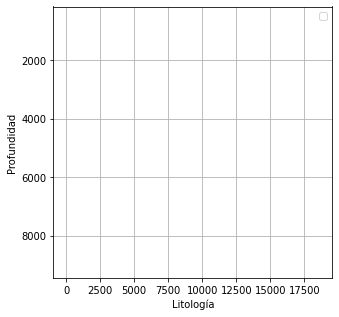

In [446]:
# Identifciación de los valores maximos y minimos del gamma ray
GR_max = df['GR'].max()
GR_min = df['GR'].min()

#Identificación de shale del resto de litologías
df.loc[df.GR > 80,'Shale']= 1

#Identificación de litologias mediante Neutron y Gamma Ray
df["Lit_ND"] = (df["DEN"] - 1.95) - (1 - (5/3)*(df["NEU"]+0.15))

# #Creación de la gráfica de litología
# fig , axs = plt.subplots(figsize=(4,12))
# plt.plot(df['Lit_ND'],df['DEPTH'])
# plt.xlabel('Litología')
# plt.ylabel('Depth')
# plt.ylim(max(df['DEPTH']),min(df['DEPTH']))
# # fig.savefig("DEPTH_vs_Lit_ND.png")

#Creacion de la litología con curvas
# Si es menor -0.03 Arenisca  2
df.loc[df.Lit_ND < -0.03,'Arenisca']= 2
# Si esta en el rango de -0.03 a 0.03 limolita 3
df.loc[df.Lit_ND >= -0.03,'Limolita']= 3
df.loc[df.Lit_ND > 0.03,'Limolita']= np.nan
#Si es mayor a 0.03 Dolomita 4
df.loc[df.Lit_ND > 0.03,'Dolomita']= 4



litologia = df[['Shale','Arenisca','Limolita','Dolomita']]
lito.columns #= ['DEPTH:1','Shale','Arenisca','Limolita','Dolomita']
lito = pd.DataFrame(litologia)
# lito = lito.set_index(['Shale','Arenisca','Limolita','Dolomita'])
print(lito.columns)

# #Creación de la gráfica de litología
fig , axs = plt.subplots(figsize=(5,5))
plt.plot(lito)
plt.grid()
plt.xlabel('Litología')
plt.ylabel('Profundidad')
plt.ylim(max(df['DEPTH:1']),min(df['DEPTH:1']))
plt.legend()
# # fig.savefig("DEPTH:1_vs_Lit_ND.png")



In [ ]:

    #Asignacion de fila de matriz density
    df.loc[df.Shale == 0,'Matrix_DEN']= 2.65
    df.loc[df.Arenisca == 2,'Matrix_DEN']= 2.654
    df.loc[df.Limolita == 3,'Matrix_DEN']= 2.711
    df.loc[df.Dolomita == 4,'Matrix_DEN']= 2.87


In [ ]:
## Si hay toc

if not "TOC" in df:
    df.loc[df.GR > 80,'TOC'] = ( 154.497 / df.DEN ) - 57.261
    df.loc[df['DEPTH:1'] < 6000,'TOC'] = np.nan
        
            #Calculo de m y Y del TOC
            # m_toc = 1 / ( ( 1 / 1.24 ) - ( 1 / df.Matrix_DEN ) )
            # y_toc = ( m_toc / df.Matrix_DEN )
            # df['TOC'] = ( m_toc / df.DEN ) + y_toc

    
#Calculo de volumen de kerogeno
df['VolK'] = (1.19 * df['TOC'] * df['DEN'])/( 100 * 1.24)

#Correcion de densidad por TOC
df.loc[df.TOC != 0,'DEN_K'] = (df['DEN'] - (1.24 * df['VolK'] )) / ( 1 - df['VolK'])

#Porosidad del kerogeno
df['Poro_K'] = 0.2 * df['TOC'] * df['DEN']

In [ ]:
#Porosidad density total
df.loc[df.DEN > 0,'Density'] = ((df['Matrix_DEN']-df['DEN'])/(df['Matrix_DEN']-1))
df.loc[df.DEN_K > 0,'Density'] = ((df['Matrix_DEN']-df['DEN_K'])/(df['Matrix_DEN']-1)) + df['Poro_K']

# Corrección de valores negativos
df.loc[df.Density > 0 ,'DEN_TOTAL'] = ""
df.loc[df.Density > 0 ,'DEN_TOTAL'] = df['Density']

#Porosidad Total Neutron mas density
df['Total_Poro'] = ( df['NEU'] + df['DEN_TOTAL'])/2

In [ ]:
#Calculo de la temperatura de la formacion
df.loc[df['DEPTH:1'] <= 100,'Temperature'] = 75
df.loc[df['DEPTH:1'] > 100,'Temperature'] = 75 + (0.74 * (df['DEPTH:1'] - 100) / 100)

In [ ]:
#Cálculo de la resistividad de la formación
df.loc[df['DEPTH:1'] > 100,'RES_CORR'] = 0.2 * ( 75 + 6.77) / ( df['Temperature'] + 6.77 )

In [ ]:
#Calculo de Vclay
GR = df['GR']
IGR = (GR-GR_min)/(GR_max-GR_min)
df['Vclay']= 1.7 - ( 3.38 - ( IGR + 0.7) ** 2 ) ** 0.5
df.loc[df.Vclay > 0.7, 'Vclay'] = 0.7

In [ ]:
#Calculo de m y a
df.loc[df.Vclay < 0.71, 'm'] = 1.08
df.loc[df.Vclay < 0.35, 'm'] = 1.33
df.loc[df.Vclay < 0.15, 'm'] = 1.54
df.loc[df.Vclay < 0.05, 'm'] = 2

#Calculo de a
df.loc[df.Vclay < 0.71, 'a'] = 2.45
df.loc[df.Vclay < 0.35, 'a'] = 1.65
df.loc[df.Vclay < 0.15, 'a'] = 1.45
df.loc[df.Vclay < 0.05, 'a'] = 1


df

,DEPTH:1,AT10,AT20,AT30,AT60,AT90,GR,PEF,NEU,DEN,...,DEN_K,Poro_K,Density,DEN_TOTAL,Total_Poro,Temperature,RES_CORR,Vclay,m,a
0,156.0,1950.000,0.517,11.119,1950.000,40.286,33.496,10.0,0.552,2.332,...,NaN,NaN,0.287701,0.287701,0.41985,75.4144,0.198992,0.023802,2.0,1.0
1,156.5,1950.000,0.517,11.119,1950.000,40.286,33.220,10.0,0.582,2.332,...,NaN,NaN,0.287701,0.287701,0.43485,75.4181,0.198983,0.023559,2.0,1.0
2,157.0,1950.000,0.517,11.119,1950.000,40.286,31.101,10.0,0.615,2.332,...,NaN,NaN,0.287701,0.287701,0.45135,75.4218,0.198974,0.021705,2.0,1.0
3,157.5,1950.000,0.517,11.119,1950.000,40.286,31.895,10.0,0.606,2.332,...,NaN,NaN,0.287701,0.287701,0.44685,75.4255,0.198965,0.022398,2.0,1.0
4,158.0,1950.000,0.517,11.119,1950.000,40.286,34.144,10.0,0.578,2.332,...,NaN,NaN,0.287701,0.287701,0.43285,75.4292,0.198956,0.024372,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18608,9460.0,360.911,430.037,1058.084,255.387,119.426,5.186,NaN,0.049,NaN,...,NaN,NaN,NaN,NaN,NaN,144.2640,0.108280,0.000000,2.0,1.0
18609,9460.5,362.193,439.600,1081.464,256.714,119.906,5.186,NaN,0.049,NaN,...,NaN,NaN,NaN,NaN,NaN,144.2677,0.108278,0.000000,2.0,1.0
18610,9461.0,363.174,441.457,1078.657,255.443,119.800,5.186,NaN,0.049,NaN,...,NaN,NaN,NaN,NaN,NaN,144.2714,0.108275,0.000000,2.0,1.0
18611,9461.5,362.959,437.822,1064.021,253.063,119.356,5.186,NaN,0.049,NaN,...,NaN,NaN,NaN,NaN,NaN,144.2751,0.108272,0.000000,2.0,1.0


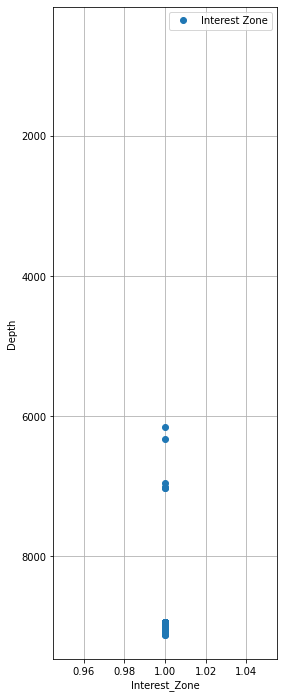

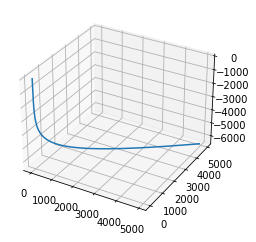

In [ ]:
#identificar valores relacionados con el Gamma Ray
GR = df[df.GR == GR_max ]
resis_GR = GR['AT90'].max()
poro_GR = GR['Total_Poro'].max()

# Calculo de porosidad efectiva
poro_efectiva = (df.DEN_TOTAL - poro_GR * df.Vclay ) * 100
df.loc[poro_efectiva > 0, 'Poro_efective'] = poro_efectiva

# Calculo de la Sw de agua de indonesia
df['Sw'] = (( ( (df.Vclay ** ( 2 - df.Vclay)/resis_GR) ** (1 / 2) ) + ( (df.Poro_efective ** df.m ) / df.RES_CORR ) ** ( 1 / 2 ) ) ** 2  * df.AT90 ) ** ( -1 / 2 )


# identificacion de zonas de interes
df.loc[ (df.TOC > 2), 'Interest_Zone'] = 1





fig , axs = plt.subplots(figsize=(4,12))
plt.plot(df['Interest_Zone'],df['DEPTH:1'],'o')
plt.grid()
plt.xlabel('Interest_Zone')
plt.ylabel('Depth')
plt.ylim(max(df['DEPTH:1']),min(df['DEPTH:1']))
plt.legend(['''Interest Zone'''])
fig = plt.show()
# Exportar a excel
# df.to_excel('Registro.xlsx',sheet_name="Registro_1_Limpio",)




#diseño del pozo en 3D
v_iz = 6500
v_hz = 3500
    
r = np.arange(0,v_hz)
    
x = r * (2**(1/2))
y = r * (2**(1/2))
z = - (v_iz / np.log(v_iz)) * np.log(np.arange(1,v_iz,(v_iz/v_hz)))

ax = plt.axes(projection='3d')
ax.plot3D(x, y, z)


# Impresion de la gráfica y vista del archivo pandas
# plt.show()
